# Learning by updating parameters

###### COMP4670/8600 - Introduction to Statistical Machine Learning - Assignment 1

Name:Longfei Zhao

Student ID:u5976992

## Instructions

|             |Notes|
|:------------|:--|
|Maximum marks| 19|
|Weight|19% of final grade|
|Format| Complete this ipython notebook. Do not forget to fill in your name and student ID above|
|Submission mode| Use [wattle](https://wattle.anu.edu.au/)|
|Formulas| All formulas which you derive need to be explained unless you use very common mathematical facts. Picture yourself as explaining your arguments to somebody who is just learning about your assignment. With other words, do not assume that the person marking your assignment knows all the background and therefore you can just write down the formulas without any explanation. It is your task to convince the reader that you know what you are doing when you derive an argument. Typeset all formulas in $\LaTeX$.|
| Code quality | Python code should be well structured, use meaningful identifiers for variables and subroutines, and provide sufficient comments. Please refer to the examples given in the tutorials. |
| Code efficiency | An efficient implementation of an algorithm uses fast subroutines provided by the language or additional libraries. For the purpose of implementing Machine Learning algorithms in this course, that means using the appropriate data structures provided by Python and in numpy/scipy (e.g. Linear Algebra and random generators). |
| Late penalty | We will not accept late assignments. You will get zero marks if you miss the deadline. Submit early, submit often. | 
| Cooperation | All assignments must be done individually. Cheating and plagiarism will be dealt with in accordance with University procedures (please see the ANU policies on [Academic Honesty and Plagiarism](http://academichonesty.anu.edu.au)). Hence, for example, code for programming assignments must not be developed in groups, nor should code be shared. You are encouraged to broadly discuss ideas, approaches and techniques with a few other students, but not at a level of detail where specific solutions or implementation issues are described by anyone. If you choose to consult with other students, you will include the names of your discussion partners for each solution. If you have any questions on this, please ask the lecturer before you act. |
| Solution | To be presented in the tutorials. |

$\newcommand{\RR}{\mathbb{R}}$

$\newcommand{\dotprod}[2]{\left\langle #1, #2 \right\rangle}$
$\newcommand{\onevec}{\mathbb{1}}$
$\newcommand{\B}[1]{\mathbf{#1}}$
$\newcommand{\Bphi}{\boldsymbol{\mathsf{\phi}}}$
$\newcommand{\BPhi}{\boldsymbol{\Phi}}$
$\newcommand{\Cond}{\,|\,}$
$\newcommand{\DNorm}[3]{\mathcal{N}(#1\Cond#2, #3)}$
$\newcommand{\DUniform}[3]{\mathcal{U}(#1 \Cond #2, #3)}$
$\newcommand{\Ex}[2][]{\mathbb{E}_{#1} \left[ #2 \right]}$
$\newcommand{\var}[1]{\operatorname{var}[#1]}$
$\newcommand{\cov}[1]{\operatorname{cov}[#1]}$
$\newcommand{\Norm}[1]{\lVert#1\rVert}$
$\DeclareMathOperator*{\argmax}{arg\,max}$

Setting up the environment (Please evaluate this cell to activate the $\LaTeX$ macros.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import multivariate_normal
from numpy.linalg import inv

%matplotlib inline

## Part 1 - (2 points) - Maximum likelihood (ML) and Maximum A Posteriori (MAP)
We assume data samples $X_n = \{ x_1,\dots,x_n \}$ are generated i.i.d. from a uniform distribution
$ \DUniform{x}{0}{\theta} $ between $ 0 $ and an unknown positive parameter $\theta$:
$$
   p(x \Cond \theta) = \DUniform{x}{0}{\theta} = 
\begin{cases}
 1/\theta & 0 \leq x \leq \theta \\
 0        & \textrm{otherwise} \\
\end{cases}
$$

Assume the data samples $ X_4 = \{ 5, 7, 3, 9 \}$ have been observed.

1. Calculate $\theta_{ML} = \argmax_{\theta} p(X_4 \Cond \theta)$, 
the maximum likelihood estimate of $\theta$ for the observed data.

- Calculate $p(\theta \Cond X_4)$, the posterior distribution of $\theta$ given that the 
data $ X_4 $ have been observed and 
the initial distribution for $\theta$ is given as $p(\theta) = p(\theta \Cond X_0) = \DUniform{x}{0}{10}$.

- Calculate $\theta_{MAP} = \argmax_{\theta} p(\theta \Cond X_4)$, the maximum a posteriori
estimate of $\theta$ given the data $ X_4 $ and the initial distribution $p(\theta)$ as in the previous question.

- Calculate $\theta_{ML}$, $p(\theta \Cond X_4)$, and $\theta_{MAP}$ for the case that the observed data are $ X_4 = \{ 9, 5, 7, 3 \}$ instead of the $ X_4 = \{ 5, 7, 3, 9 \}$ given above.

### <span style="color:blue">Answer</span>
1.
Since i.i.d,

$ \therefore L(\theta) 
= L(X \Cond \theta) 
= \prod_{i=1}^{n}p(x_i \Cond \theta) 
= \prod_{i=1}^{n}\DUniform{x_i}{0}{\theta} 
= \begin{cases}
 1/\theta^n & 0 \leq x_i \leq \theta, i =1,...,n \\
 0        & \textrm{otherwise} \\
\end{cases}$

$ \Rightarrow \theta_{ML} \geq \max(X_n)$

$ \because \frac{\partial{L(\theta)}}{\partial{\theta}} < 0$

$ \therefore \theta_{ML} = min(\theta)$

$ \Rightarrow \theta_{ML} = max(X_4) = 9$


2.

$ p(\theta) 
= p(\theta \Cond X_0) 
= \DUniform{x}{0}{10} 
= \begin{cases}
 \frac{1}{10} & 0 \leq \theta \leq 10\\
 0        & \textrm{otherwise} \\
\end{cases}$    

$ p(X_4 \Cond \theta) 
= \prod_{i=1}^{4}p(x_i \Cond \theta) 
= \prod_{i=1}^{4}\DUniform{x_i}{0}{\theta} 
= \begin{cases}
 1/\theta^4 & 0 \leq x_i \leq \theta, i =1,2,3,4 \\
 0        & \textrm{otherwise} \\
\end{cases}$

$ p(X_4) 
= \int^{+\infty}_{-\infty}p(X_4\Cond\theta)p(\theta)d{\theta} 
= \int^{9}_{-\infty}0 \cdot \frac{1}{10} d{\theta} + \int^{10}_{9} \frac{1}{\theta^4} \cdot \frac{1}{10} d{\theta} + \int^{+\infty}_{10}0 \cdot \frac{1}{10} d{\theta} 
= -\frac{1}{30} \cdot \theta^{-3}\Cond^{10}_{9} 
= 1.24 \times 10^{-5} $        

$\Rightarrow p(\theta\Cond X_4) 
= \frac{p(X_4\Cond \theta)p(\theta)}{p(X_4)} 
= \frac{1}{\theta^4} \cdot \frac{1}{10} \cdot \frac{10^{5}}{1.24}
= \frac{8.0645 \times 10^{3}}{\theta^4} \; \; \; ( max(X_4) \leq \theta \leq 10) $

$ p(\theta\Cond X_4) = 
\begin{cases}
 \frac{8.0645 \times 10^{3}}{\theta^4} & max(X_4) \leq \theta \leq 10 \\
 0        & \textrm{otherwise} \\
\end{cases}
$

3.

$\theta_{MAP} = \argmax_{\theta} p(\theta \Cond X_4)$

$\Rightarrow 9 \leq  \theta_{MAP} \leq 10$

$\because \frac{\partial{p(\theta \Cond X_4)}}{\partial{\theta}} < 0$

$\Rightarrow \theta_{MAP} = 9$

4.

Since i.i.d, change the sequence will not affect the result, therefore

$ \theta_{ML} = 9 $

$ \theta_{MAP} = 9 $

$ p(\theta\Cond X_4) = 
\begin{cases}
 \frac{8.0645 \times 10^{3}}{\theta^4} & max(X_4) \leq \theta \leq 10\\
 0 & \textrm{otherwise} \\
\end{cases}
$

## Part 2 - Bayesian Sequential Update of the Posterior

Consider the following data simulator, which returns one single $(x_n, t_n)$ pair, where $x_n\in\RR$ and $t_n\in\RR$.

In [2]:
def sim_one_example(a0=-0.2, a1=0.8, sigma2=0.04):
    """Generate one single (x,t) pair,
    where x is drawn uniformly in [-1, 1]
    and y(x,a) = a0 + a1 * x, and Gaussian noise with variance 0.04 is added.
    t = N(x | y(x,a), 0.04)
    """
    x = np.random.uniform(-1, 1)
    y = a0 + a1 * x
    t = np.random.normal(y, sigma2)
    return x, t

Using the simulator as above, we will implement the Bayesian Sequential Update algorithm of **Section 3.3.1** of the course textbook, to generate **Figure 3.7** in the textbook.

### 2A - (3 points) - Define, Plot and Explain

Suppose that we estimate a weight vector $\mathbf{w}$ from data using a Gaussian prior and Gaussian likelihood. Write down (with appropriate definitions) the equations of the prior and posterior distributions estimating $\mathbf{w}$ from $N$ data points. Assume that the prior is zero-mean and has a diagonal covariance matrix with precision $\alpha$.


### <span style="color:blue">Answer</span>
$\newcommand{\matr}[1]{\mathbf{#1}} $
1. Prior distribution: $p(w) = \mathcal{N}(w \Cond 0, \alpha^{-1} \matr{I})$
2. likelihood: $p(t \Cond w) = \mathcal{N}(t \Cond \Phi w, \beta^{-1}\matr{I})$
3. Posterior distribution: $p(w \Cond t) = \mathcal{N}(w \Cond m_N, S_N)$, where
$m_N =\beta S_N \Phi^Tt$, $S_N^{-1} = \alpha \matr{I} + \beta \Phi^T\Phi$

Plot the following 9 figures in 3 rows by 3 columns. The columns are the likelihood, the prior/posterior, and 5 samples from the prior/posterior distribution. Also plot on the rightmost plot the data. The first row should depict the situation before observing any data, and the following two rows depict the situation after observing the first and second (example, label) pair respectively. Refer to **Figure 3.7** in the textbook.

Initialise the prior precision to $\alpha = 2.0$ and the likelihood precision to $\beta = 25.0$.

Set the random seed for reproducibility, by passing your student ID to the function ```np.random.seed```.

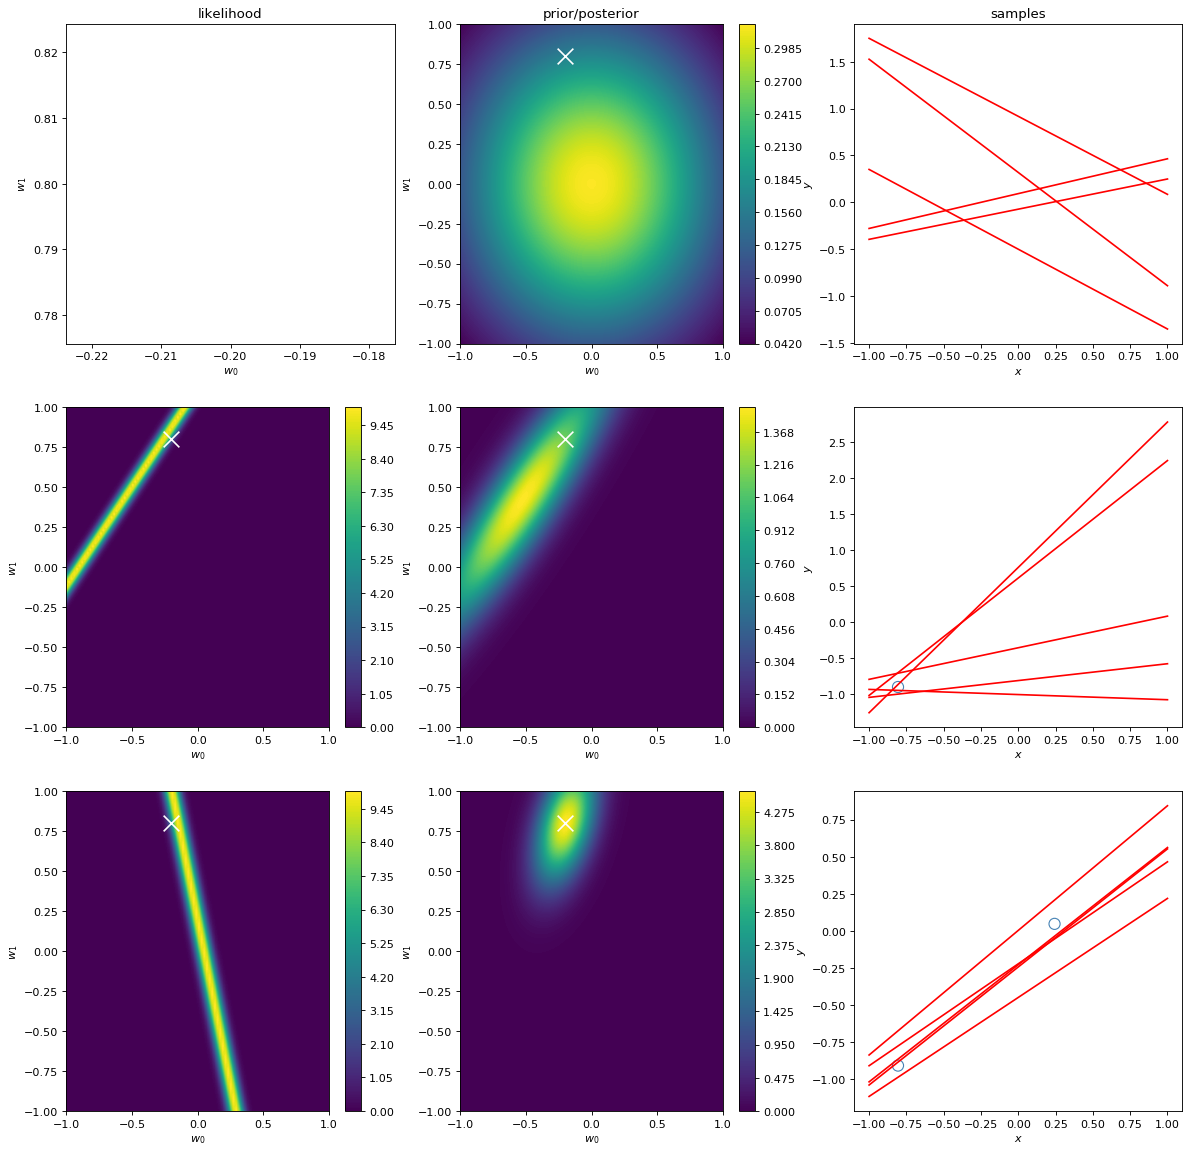

In [3]:
np.random.seed(5976992)
alpha = 2
beta = 25
I = np.identity(2)
a0=-0.2
a1=0.8
m0 = np.zeros(2).reshape(2, 1)
s0 = alpha ** -1 * I
x = np.linspace(-1, 1, 100)
w0, w1 = np.meshgrid(
    np.linspace(-1, 1, 100),
    np.linspace(-1, 1, 100))
w = np.array([w0, w1]).transpose(1, 2, 0)
xs = []
ts = []

fig=plt.figure(figsize=(18, 18), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(3, 3, 1)
plt.title("likelihood")
plt.subplot(3, 3, 2)
plt.title("prior/posterior")
plt.subplot(3, 3, 3)
plt.title("samples")

for i in range(3):
    if i != 0:
        x_sample, t_sample = sim_one_example()
        xs.append(x_sample)
        ts.append(t_sample)
    for j in range(3):
        plt.subplot(3, 3, i * 3 + j + 1)
        if j == 0:
            plt.xlabel("$w_0$")
            plt.ylabel("$w_1$")
            if i:
                plt.contourf(w0, w1, norm.pdf(t_sample, w0 + x_sample * w1, beta ** -1), 200)
                plt.colorbar()
            plt.scatter(a0, a1, c="w", s=200, marker="x")
        if j == 1:
            plt.xlabel("$w_0$")
            plt.ylabel("$w_1$")
            if i == 0:
                plt.contourf(w0, w1, multivariate_normal.pdf(w, m0.ravel(), s0), 200)
                plt.colorbar()
            else:
                phi = np.array([[1, x_sample]])
                sN =inv(inv(s0) + beta * phi.T @ phi)
                mN = sN @ (inv(s0) @ m0 + beta * phi.T * t_sample)
                s0 = sN
                m0 = mN
                plt.contourf(w0, w1, multivariate_normal.pdf(w, mN.ravel(), sN), 200)
                plt.colorbar()
            plt.scatter(a0, a1, c="w", s=200, marker="x")
        if j == 2:
            plt.xlabel("$x$")
            plt.ylabel("$y$")
            w0_samples, w1_samples = np.random.multivariate_normal(m0.ravel(), s0, size = 5).T
            for w0_sample, w1_sample in zip(w0_samples, w1_samples):
                y = w0_sample + x * w1_sample
                plt.plot(x, y, c='red')
            if i:
                plt.scatter(xs, ts, s=100, facecolor="none", edgecolor="steelblue")
plt.show()

Describe what is happening in the above plots. At a minimum, explain why the likelihood function makes sense in light of the sampled data point, and why the posterior makes sense.

### <span style="color:blue">Answer</span>
Before we obverse any data, the prior should be $\mathcal{N}(0, \alpha^{-1} \matr{I})$. We use this distribution to generate 5 sample $(w_0, w_1)$ and draw the line $y = w_0 + w_1x$.

Then we get a sample $(x_1,t_1)$, since $t \sim \mathcal{N}(\Phi w, \beta^{-1}\matr{I})$, which means that when $w_0 + w_1x_1$ close to $t$, $p(t \Cond w)$ will increase. Notice that $w_0 + w_1x_1$ is linear relation, that's why the likelihood figure like a line.

After that, we use the prior and the likelihood to calculate posterior. Intuitively, the posterior will close to the trend of the likelihood, based on the prior.

We use this new posterior to generate 5 new sample $(w_0, w_1)$ and draw the line $y = w_0 + w_1x$. Repeat this process. 

### 2B - (2 points) - Interpret the Result

After presenting your algorithm with 13 samples, plot the likelihood, posterior and 5 samples from the prior/posterior distribution. Also plot all your samples on the rightmost plot. This is similar to the bottom row of **Figure 3.7** in the textbook. Set the random seed to your student number once again.

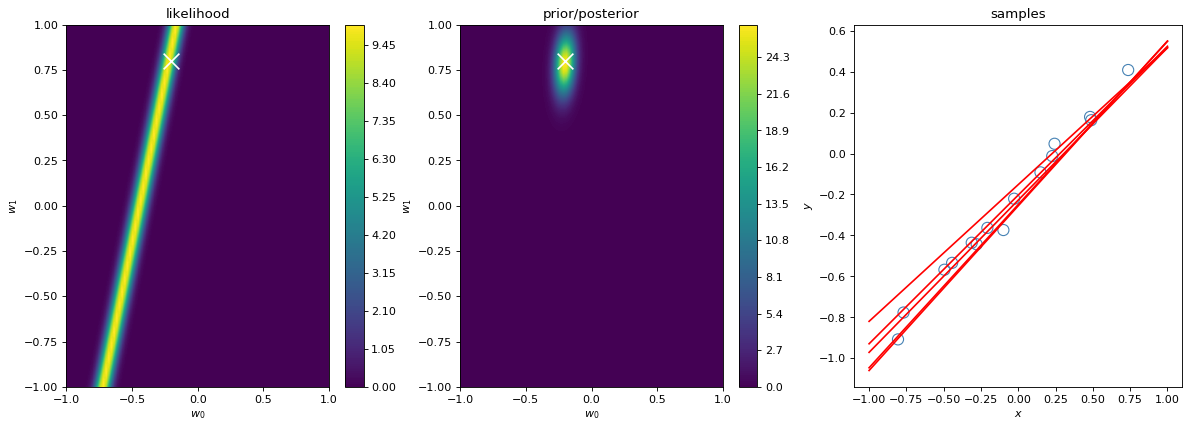

In [4]:
np.random.seed(5976992)

fig=plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')

for i in range(13):
    x_sample, t_sample = sim_one_example()
    xs.append(x_sample)
    ts.append(t_sample)
    phi = np.array([[1, x_sample]])
    sN =inv(inv(s0) + beta * phi.T @ phi)
    mN = sN @ (inv(s0) @ m0 + beta * phi.T * t_sample)
    s0 = sN
    m0 = mN

plt.subplot(1, 3, 1)
plt.title("likelihood")
plt.xlabel("$w_0$")
plt.ylabel("$w_1$")
plt.contourf(w0, w1, norm.pdf(t_sample, w0 + x_sample * w1, beta ** -1), 200)
plt.colorbar()
plt.scatter(a0, a1, c="w", s=200, marker="x")

plt.subplot(1, 3, 2)
plt.title("prior/posterior")
plt.xlabel("$w_0$")
plt.ylabel("$w_1$")
plt.contourf(w0, w1, multivariate_normal.pdf(w, mN.ravel(), sN), 200)
plt.colorbar()
plt.scatter(a0, a1, c="w", s=200, marker="x")

plt.subplot(1, 3, 3)
plt.title("samples")
plt.xlabel("$x$")
plt.ylabel("$y$")
w0_samples, w1_samples = np.random.multivariate_normal(mN.ravel(), sN, size = 5).T
for w0_sample, w1_sample in zip(w0_samples, w1_samples):
    y = w0_sample + x * w1_sample
    plt.plot(x, y, c='red')
plt.scatter(xs, ts, s=100, facecolor="none", edgecolor="steelblue")

By referring to the figures above, explain why your algorithm has reached a sensible solution.

### <span style="color:blue">Answer</span>
With more and more data, $m_N$ will converge to the truely values and the $S_N$ will decease. Therefore, when we generate sample $(w_0, w_1)$, the line will close to the truely result.

In the question above, we suggested setting $\alpha = 2.0$. Discuss what would happen for:

1. $\alpha = 200$ 
2. $\alpha = 0.02$

You should use some plots as evidence for your discussion.


aplha =  200


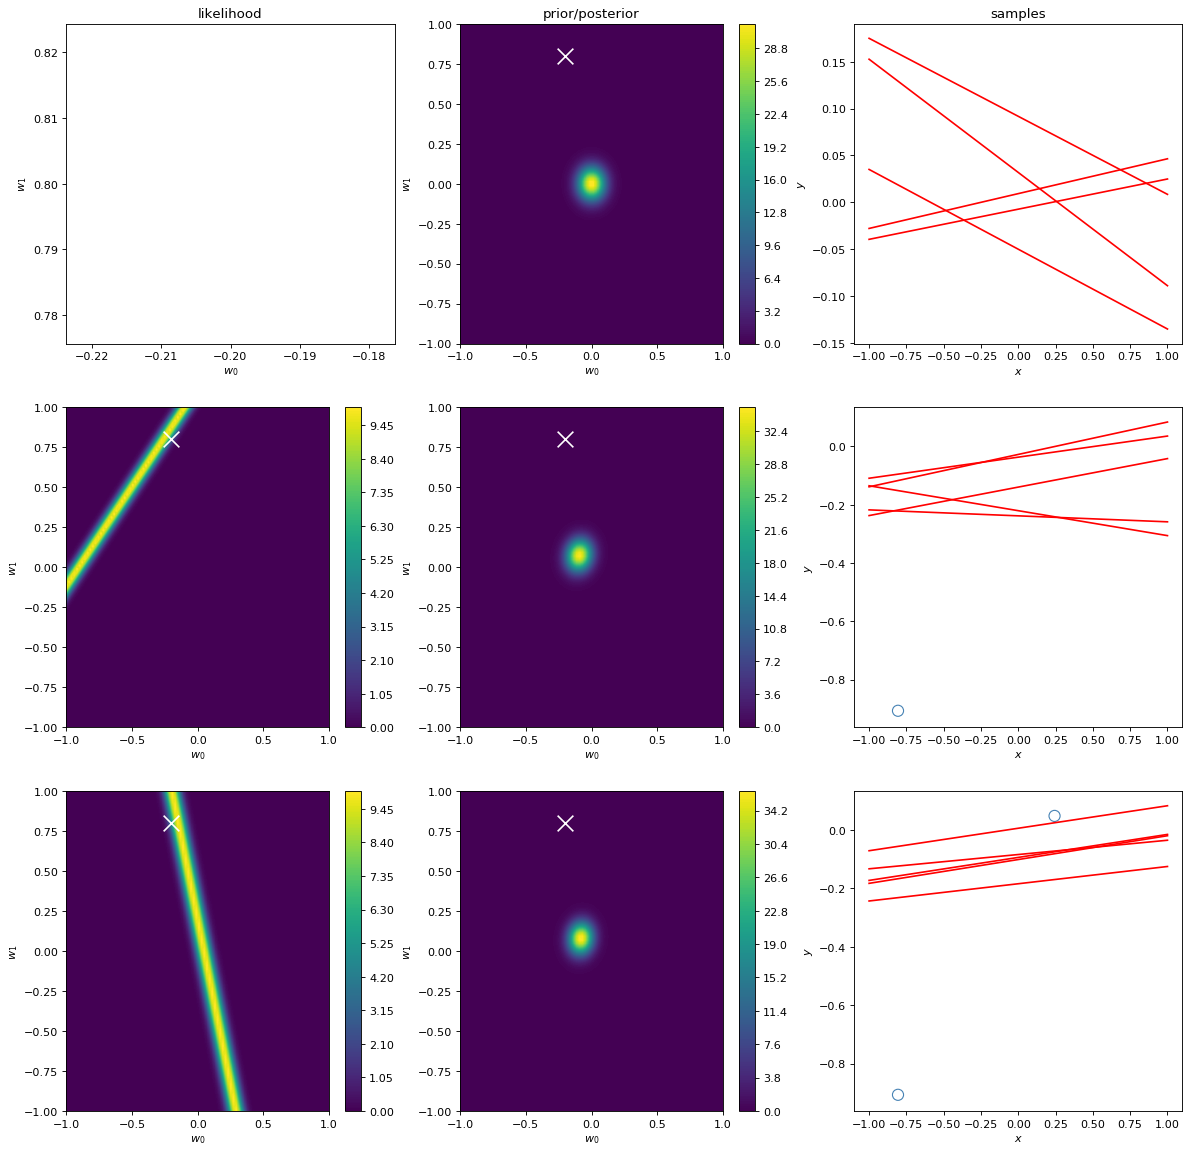

aplha =  0.02


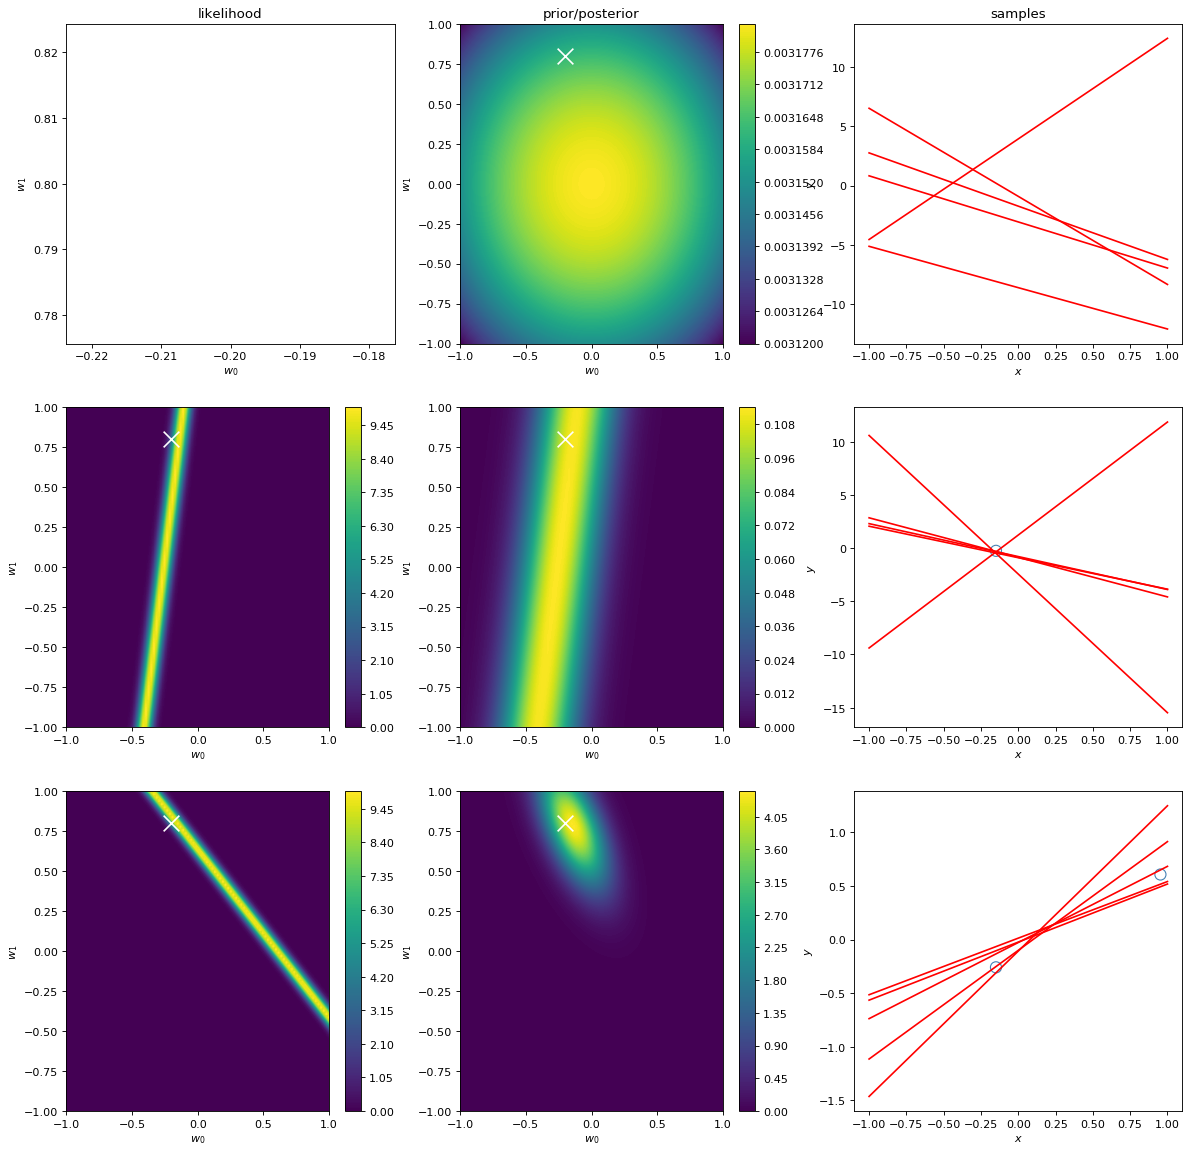

In [5]:
np.random.seed(5976992)

def pltwithalpha(alpha):
    print('aplha = ', alpha)
    m0 = np.zeros(2).reshape(2, 1)
    s0 = alpha ** -1 * I
    xs = []
    ts = []
    fig=plt.figure(figsize=(18, 18), dpi= 80, facecolor='w', edgecolor='k')
    plt.subplot(3, 3, 1)
    plt.title("likelihood")
    plt.subplot(3, 3, 2)
    plt.title("prior/posterior")
    plt.subplot(3, 3, 3)
    plt.title("samples")
    for i in range(3):
        if i != 0:
            x_sample, t_sample = sim_one_example()
            xs.append(x_sample)
            ts.append(t_sample)
        for j in range(3):
            plt.subplot(3, 3, i * 3 + j + 1)
            if j == 0:
                plt.xlabel("$w_0$")
                plt.ylabel("$w_1$")
                if i:
                    plt.contourf(w0, w1, norm.pdf(t_sample, w0 + x_sample * w1, beta ** -1), 200)
                    plt.colorbar()
                plt.scatter(a0, a1, c="w", s=200, marker="x")
            if j == 1:
                plt.xlabel("$w_0$")
                plt.ylabel("$w_1$")
                if i == 0:
                    plt.contourf(w0, w1, multivariate_normal.pdf(w, m0.ravel(), s0), 200)
                    plt.colorbar()
                else:
                    phi = np.array([[1, x_sample]])
                    sN =inv(inv(s0) + beta * phi.T @ phi)
                    mN = sN @ (inv(s0) @ m0 + beta * phi.T * t_sample)
                    s0 = sN
                    m0 = mN
                    plt.contourf(w0, w1, multivariate_normal.pdf(w, mN.ravel(), sN), 200)
                    plt.colorbar()
                plt.scatter(a0, a1, c="w", s=200, marker="x")
            if j == 2:
                plt.xlabel("$x$")
                plt.ylabel("$y$")
                w0_samples, w1_samples = np.random.multivariate_normal(m0.ravel(), s0, size = 5).T
                for w0_sample, w1_sample in zip(w0_samples, w1_samples):
                    y = w0_sample + x * w1_sample
                    plt.plot(x, y, c='red')
                if i:
                    plt.scatter(xs, ts, s=100, facecolor="none", edgecolor="steelblue")
    plt.show()

pltwithalpha(200)
pltwithalpha(0.02)

### <span style="color:blue">Answer</span>
Firstly, likelihood is irrelevant with $\alpha$, therefore as we can see, likelihood don't change its scale. For prior/posterior, larger $\alpha$ will get a smaller variance. Notice that $\alpha$ is in direct proportion to $\lambda$ which is the regularization parameter. Therefore, when $\alpha$ is small, convergence is quick and it's easy to overfitting, while when $\alpha$ is large, convergence is slow and there's a high bias.

## Part 3: Stochastic Gradient Descent

In this question, we derive solutions for regularized least squares linear regression and regularized logistic regression using stochastic gradient descent. We will consider what is known as the streaming setting; we will only make a single pass through a dataset.

### 3A - (1 point) - Describe Stochastic Gradient Descent

Describe in a few sentences what is stochastic gradient descent. Make sure you include the equation of the update rule.

### <span style="color:blue">Answer</span>
Generally, when we use machine learning. We consider a objective function, such as:
$$ Q(w)={\frac {1}{n}}\sum _{i=1}^{n}Q_{i}(w)$$
What we need to do is to find the best $w'$ to minimizes $Q(w)$. For some huge problem, it's hard to calculate the $w'$ directly. Alternatively, we could start from some initial $w_0$, which is just random, and repeatedly takes a step in the direction of steepest decrease of $Q(w)$. Finally, we should get some reasonable $w$, which is close to $w'$. This is called batch
gradient descent. The update rule is as follow:
$$w:=w-\eta \nabla Q(w)=w-\eta \sum _{i=1}^{n}\nabla Q_{i}(w)/n$$
However, computational expense for batch gradient descent is large. Therefore, each time we can just use single training example to update the $w$. In practice, the result is also close to $w'$. This is called stochastic gradient descent. The update rule is as follow:
$$w:=w-\eta \nabla Q_{i}(w)$$

### 3B - (1 point) - Least Squares Linear Regression

Consider the problem of batch gradient descent, where we use the whole dataset. Write down the equation of the cost function of sum of squared error linear regression using $\frac{\lambda}{2} \B{w}^\top \B{w}$ as a regularizer. 

Derive the contribution of a single training example to the gradient of the cost function. Include the gradient of the regularisation term in this gradient contribution.

Implement the cost function and gradient contribution you just derived. Also implement the predictor corresponding to a given parameter vector.

### <span style="color:blue">Answer</span>
cost function $ E = E_D(w) + \lambda E_w(w) = \frac{1}{2}(t - \Phi w)^T(t - \Phi w)
+ \frac{1}{2} \lambda w^Tw$

Given a sample $(x_i, t_i)$, the gradient of the cost function is
$\frac{\partial E}{\partial w} = (\Phi_i w - t_i) \Phi_i^T + \lambda w$

In [6]:
class linear:
    def cost(w, phi, ts, regulator):
        return np.asscalar(0.5 * (ts - phi @ w).T @ (ts - phi @ w) + 0.5 * regulator * w.T @ w)

    def gradient(phii, ti, w, regulator):
        return (phii @ w - ti) * phii.T + regulator * w

    def predict(w, phi):
        return phi @ w

### 3C - (1 point) - Logistic Regression

Write down the cost function of logistic regression using sum of cross-entropy and $\frac{\lambda}{2} \B{w}^\top \B{w}$ as a regulariser. 

Derive the contribution of a single training example to the gradient of the cost function. Include the gradient of the regularisation term in this gradient contribution.

Implement the cost function and gradient contribution you just derived. Also implement the predictor corresponding to a given parameter vector. Also implement the predictor corresponding to a given parameter vector, which predicts 1 or 0 by thresholding the outputs of the sigmoid function.

### <span style="color:blue">Answer</span>
Assume $y_i = \sigma(\phi_i w) = \frac{1}{1+\exp^{-\phi_i w}}$

Likelihood function $p(t \Cond w) = \prod_{i=1}^{n} y^{t_n}(1 - y_n)^{1-t_n}$

cost function $ E = E_D(w) + \lambda E_w(w) = - \sum_{i=1}^{n} (t_n\ln y_n + (1-t_n)\ln(1-y_n)) + \frac{1}{2} \lambda w^Tw$

Given a sample $(x_i, t_i)$, the gradient of the cost function is
$\frac{\partial E}{\partial w} = (y_i - t_i) \Phi_i^T + \lambda w$

In [15]:
class logistic:
    def sigma(w, phi):
        return 1 / (1 + np.exp(-phi @ w))

    def cost(w, phi, ts, regulator):
        ys = logistic.sigma(w, phi)
        return np.asscalar(-((ts.T @ np.log(ys)) + ((1-ts).T @ np.log(1-ys))) + 0.5 * regulator * w.T @ w)

    def gradient(phii, ti, w, regulator):
        yi = logistic.sigma(w, phii)
        return (yi - ti) * phii.T + regulator * w

    def predict(w, phi):
        return phi @ w > 0

### 3D - (1 point) - Implement Stochastic Gradient Descent

Implement stochastic gradient descent for a general gradient contribution function.

The function should store the values of:

1. The norm of the gradient
2. The value of the parameters

at each iteration. *Note that this is a memory inefficient requirement.*

At the end of the iterations, return the values.

In [16]:
def SGD(mode, phi, ts, learning_rate, regulator):
    ws = []
    grads = []
    w = np.random.rand(2).reshape(2, 1)
    for phii, ti in zip(phi, ts):
        phii = np.array(phii).reshape(1, 2)
        grad = mode.gradient(phii, ti, w, regulator)
        ws.append(w)
        grads.append(grad)
        w = w - learning_rate * grad
    return ws, grads

### 3E - (3 points) - Solve Least Squares Regression and Logistic Regression

In this section, you have to make some design choices. Please specify these choices clearly and justify why you made these choices. Sample 100 (example, label) pairs from the simulator above and set aside as a test set. Sequentially sample 100 additional (example, label) pairs from the simulator above as a training set. 

#### Least Squares Regression

Use the gradient you implemented in **3B** above as arguments to your stochastic gradient descent algorithm. Plot the following two plots:

1. The value of the sum of squared error cost function on the test set after each sample
2. The value of the test root mean squared error after each sample

#### Logistic Regression

Use the gradient you implemented in **3C** above as arguments to your stochastic gradient descent algorithm.
If the target is positive, then use it as a binary label that is positive. Otherwise treat it as a negative label. Plot the following two plots:

1. The value of the sum of cross-entropy cost function on the test set after each sample
2. The value of the accuracy on the test set after each sample.

### Test for Correctness

Write two tests to check that your solutions above makes sense. Do not use the fact that you know the true value of the parameters (as this is never available to you in practice).

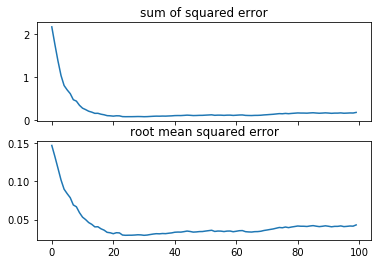

In [17]:
def gen_n_example(n):
    xs = []
    ts = []
    for i in range(n):
        x, t = sim_one_example()
        xs.append(x)
        ts.append(t)
    xs = np.array(xs).reshape(n, 1)
    phi = np.hstack((np.ones((n, 1)), xs))
    ts = np.array(ts).reshape(n, 1)
    return xs, phi, ts

x_train, phi_train, t_train = gen_n_example(100)
x_test, phi_test, t_test = gen_n_example(100)

learning_rate = 0.1
regulator=0.03
ws_linear, grads_linear = SGD(linear, phi_train, t_train, learning_rate, regulator)
costs = []
for i in np.arange(100):
    costs.append(linear.cost(ws_linear[i], phi_test, t_test, regulator))
costs = np.array(costs)

ax1 = plt.subplot(2, 1, 1)
plt.plot(np.arange(100), costs)
plt.title('sum of squared error')
plt.setp(ax1.get_xticklabels(), visible=False)

plt.subplot(2, 1, 2, sharex = ax1)
plt.plot(np.arange(100), np.sqrt(costs / 100))
plt.title('root mean squared error')
plt.show()

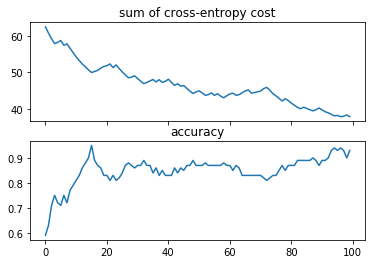

In [21]:
n = 100
x_train, phi_train, t_train = gen_n_example(n)
x_test, phi_test, t_test = gen_n_example(n)
t_train = t_train > 0
t_test = t_test > 0

learning_rate = 0.1
regulator=0.03

ws, grads_logistic = SGD(logistic, phi_train, t_train, learning_rate, regulator)
costs = []
accs = []
for i in np.arange(100):
    costs.append(logistic.cost(ws[i], phi_test, t_test, regulator))
    accs.append((logistic.predict(ws[i], phi_test) == t_test).sum() / n)

ax1 = plt.subplot(2, 1, 1)
plt.plot(np.arange(100), costs)
plt.title('sum of cross-entropy cost')
plt.setp(ax1.get_xticklabels(), visible=False)
   
plt.subplot(2, 1, 2, sharex = ax1)
plt.plot(np.arange(100), accs)
plt.title('accuracy')

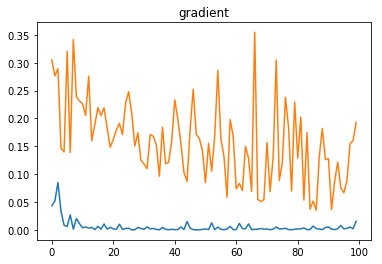

In [22]:
def test1():
    grads_linear_dis = []
    grads_logistic_dis = []
    for i in range(100):
        grads_linear_dis.append(grads_linear[i][0] ** 2 + grads_linear[i][1] ** 2)
        grads_logistic_dis.append(grads_logistic[i][0] ** 2 + grads_logistic[i][1] ** 2)
    plt.plot(np.arange(100), grads_linear_dis)
    plt.plot(np.arange(100), grads_logistic_dis)
    plt.title('gradient')
    plt.show()
test1()

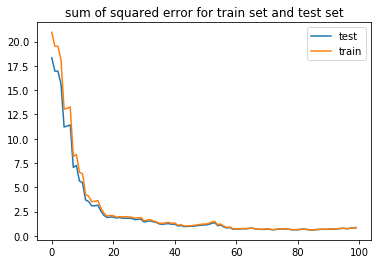

In [23]:
def test2():
    x_train, phi_train, t_train = gen_n_example(100)
    x_test, phi_test, t_test = gen_n_example(100)
    learning_rate = 0.1
    regulator=0.1
    ws_linear, grads_linear = SGD(linear, phi_train, t_train, learning_rate, regulator)
    costs_test = []
    costs_train = []
    for i in np.arange(100):
        costs_test.append(linear.cost(ws_linear[i], phi_test, t_test, regulator))
        costs_train.append(linear.cost(ws_linear[i], phi_train, t_train, regulator))
    test, = plt.plot(np.arange(100), costs_test, label='test')
    train, = plt.plot(np.arange(100), costs_train, label='train')
    plt.legend(handles=[test, train])
    plt.title('sum of squared error for train set and test set')
test2()

### <span style="color:blue">Answer</span>
1. Function `gen_n_example(n)` can directly generate n samples, which already add $\phi(x)$ and reshape.
2. I build two class `linear` and `logistic`, which have the same functions `cost`, `gradient` and `predict`. So when we use SGD, we just give the class name to determine which method we want to use.
3. For logistic, I use `t_train > 0` to change $t$ to {0, 1} sets
4. For test1, I plot both of the trend of the gradient. As we can see, the gradient is going down, that makes sence. Along with searching, we are close to minimum and it becomes more and more flat.
5. For test2, assume train set and test set have same number of samples. I plot sum of squared error of train set and test set. As we can see, both of them are going down and test set is slightly larger than train set, which make sence. We use train set to train the model so the error of train set should be smaller than test set. Along with iteration, the difference of them should be more and more small because $w$ we get become more and more generalized.

## Part 2: Analysis of algorithms

### (5 points) Incremental EM
$\newcommand{\B}[1]{\mathbf{#1}}$
$\newcommand{\Btheta}{\boldsymbol{\mathsf{\theta}}}$
$\newcommand{\Cond}{\,|\,}$
$\newcommand{\DNorm}[3]{\mathcal{N}(#1\Cond#2,#3)}$
$\newcommand{\DUniform}[3]{\mathcal{U}(#1\Cond#2,#3)}$
$\newcommand{\dd}{\;\mathrm{d}}$
Given are $N$ independent data points $\B{x}_1,\dots,\B{x}_N$ and a Gaussian mixture model with corresponding latent variables $\B{z}_1,\dots,\B{z}_N$. As the joint distribution $p(\B{X}, \B{Z} \Cond \Btheta)$ factorises over the data points, one can develop an incremental form of EM in which only one data point is processed in each E- and M-step if the mixture component is a member of the exponential family. 

Consider a mixture of Gaussians. The update for the effective number of data points $N_k$ after having seen data point $\B{x}_m$ can be derived as
$$
  N_k^\text{new} = N_k^\text{old} + \gamma^\text{new}(z_{mk}) - \gamma^\text{old}(z_{mk})
$$

1. Define $\gamma^\text{new}(z_{mk})$.
- Prove the above given result for the update of $N_k$.
- Develop the update formulas for the other parameters of the Gaussian mixture model: 
  - mixture coefficients $\mathsf{\pi}_k$, 
  - means $\mathsf{\mu}_k$, and 
  - covariances $\mathsf{\Sigma}_k$.
- Define and explain two properties of this incremental EM algorithm which make it preferable method over batch EM.

### <span style="color:blue">Answer</span>
1.
$$ \gamma^\text{new}(z_{mk}) 
= \frac{\pi^\text{old}_k \mathcal{N}(x_m \Cond \mu^\text{old}_k, \Sigma^\text{old}_k)}
{\sum_{j=1}^K \pi^\text{old}_j \mathcal{N}(x_m \Cond \mu^\text{old}_j, \Sigma^\text{old}_j)} $$

2.

Before doing E-step,

$$N_k^\text{old} = \sum_{n=1}^N\gamma^\text{old}(z_{nk}) = \sum_{n \neq m}^N\gamma^\text{old}(z_{nk}) + \gamma^\text{old}(z_{mk})$$

After doing E-step, $\gamma(z_{mk})$ update to $\gamma^\text{new}(z_{mk})$ and for any $i \neq m$, $\gamma(z_{ik})$ doesn't change. Therefore,

$$N_k^\text{new} = \sum_{n \neq m}^N\gamma^\text{old}(z_{nk}) + \gamma^\text{new}(z_{mk}) = N_k^\text{old} + \gamma^\text{new}(z_{mk}) - \gamma^\text{old}(z_{mk})$$

3.

$\pi^\text{new}_k 
= \frac{N_k^\text{new}}{N} 
= \frac{1}{N}(N_k^\text{old} + \gamma^\text{new}(z_{mk}) - \gamma^\text{old}(z_{mk})) 
= \pi_k^\text{old} +  \frac{1}{N}(\gamma^\text{new}(z_{mk}) - \gamma^\text{old}(z_{mk}))$

$\mu_k^\text{new} = \frac{1}{N_k^\text{new}} \sum_{n=1}^N \gamma(z_{nk})x_n = \frac{1}{N_k^\text{new}} (\sum_{n \neq m}^N \gamma^\text{old}(z_{nk})x_n + \gamma^\text{new}(z_{mk})x_m) = \mu_k^\text{old} - \frac{1}{N_k^\text{new}}(\gamma^\text{new}(z_{mk})x_m - \gamma^\text{old}(z_{mk})x_m)$


\begin{align}
\Sigma_k^\text{new} & = \frac{1}{N_k^\text{new}} \sum_{n=1}^N \gamma(z_{nk})(x_n - \mu^\text{new}_k)(x_n - \mu^\text{new}_k)^T \\
& = \frac{1}{N_k^\text{new}} (\sum_{n \neq m}^N \gamma^\text{old}(z_{nk})(x_n - \mu^\text{new}_k)(x_n - \mu^\text{new}_k)^T + \gamma^\text{new}(z_{mk})(x_m - \mu^\text{new}_k)(x_m - \mu^\text{new}_k)^T) \\
\ &= \frac{N_k^\text{old}}{N_k^\text{new}}\Sigma_k^\text{old} + \frac{1}{N_k^\text{new}}(\sum_{n=1}^N \gamma^\text{old}(z_{nk})((x_n - \mu_k^\text{new})(x_n - \mu_k^\text{new})^T - (x_n - \mu_k^\text{old})(x_n - \mu_k^\text{old})^T)
+ (\gamma^\text{new}(z_{mk}) - \gamma^\text{old}(z_{mk}))(x_m - \mu^\text{new}_k)(x_m - \mu^\text{new}_k)^T\\
\ &= \frac{N_k^\text{old}}{N_k^\text{new}}\Sigma_k^\text{old} + \frac{1}{N_k^\text{new}}(\sum_{n=1}^N \gamma^\text{old}(z_{nk})(2x_n((\mu_k^\text{old})^T - (\mu_k^\text{new})^T) + \mu_k^\text{new}(\mu_k^\text{new})^T - \mu_k^\text{old}(\mu_k^\text{old})^T))
+ (\gamma^\text{new}(z_{mk}) - \gamma^\text{old}(z_{mk}))(x_m - \mu^\text{new}_k)(x_m - \mu^\text{new}_k)^T\\
&= \frac{N_k^\text{old}}{N_k^\text{new}} (\Sigma_k^\text{old} 
+ 2\mu_k^\text{old}((\mu_k^\text{old})^T - (\mu_k^\text{new})^T) 
+ \mu_k^\text{new}(\mu_k^\text{new})^T - \mu_k^\text{old}(\mu_k^\text{old})^T)
+ \frac{1}{N_k^\text{new}}((\gamma^\text{new}(z_{mk}) - \gamma^\text{old}(z_{mk}))(x_m - \mu^\text{new}_k)(x_m - \mu^\text{new}_k)^T
\end{align}

4.

- Fast execution: According to above, in each step, we just use single dateset $x_m$ and previous parameters to calculate new parameters. In other words, We don't need to use all $x_i$ in each step. Therefore, it's much faster than batch EM.
- Avoiding local maximum: For batch EM, it typically converges to a local optimum. With Incremental EM, I think, it has a chance to jump from a local optimum. Therefore, it maybe get a better result than batch EM.